# Annexe G : Représentation sur une carte du monde

## Choix de la projection

Nous utilisons ici une projection simple devenu *de facto* un stantard pour la représentation plate du globale en dehors des contextes spécialisés, la projection **équirectangulaire** ou **cylindrique équidistante**, qui utilise les coordonnées polaires comme des coordonnées cartésiennes.

Dans cette représentation, un point de latitude $\varphi$ et de longitude $\lambda$ a pour coordonnées $(x,y)$ lorsqu'il est projeté sur une carte dont le point $(\varphi_0, \lambda_0)$ est au centre à l'origine :
$$
\begin{cases}
x = \cos{\varphi_0} \left(\lambda - \lambda_0\right)\\
y = \varphi - \varphi_0
\end{cases}
$$

Lorsque cette projection est centrée sur le méridien de Greenwich (origine des longitudes, $\varphi_0 = 0$) et sur  l'équateur (origine des latitudes, $\lambda_0 = 0$), ces expressions se simplifient en :
$$
\begin{cases}
x = \lambda\\
y = \varphi
\end{cases}
$$

Cette projection équirectangulaire particulière est appellée projection **plate carrée**, que nous utilisons ici.

## Création d'un fond de carte
Nous utilisons une [carte issue de Wikimédia Commons](https://commons.wikimedia.org/wiki/File:Equirectangular_projection_SW.jpg), projetant en plate carrée la représentation des terres et océans de la planète.

![Equirectangular_projection_SW.jpg sur Wikimedia Commons](https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/Equirectangular_projection_SW.jpg/320px-Equirectangular_projection_SW.jpg)

Nous éditons ce fichier pour supprimer ses marges, afin de nous en servir comme fond de carte, couvrant l'ensemble des longitudes et latitudes.

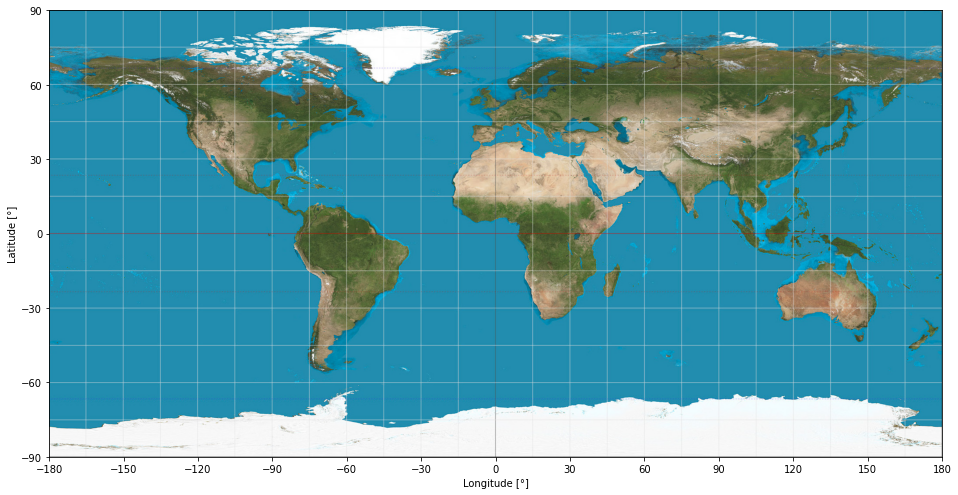

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Visualition sur toute la largeur du notebook
plt.figure(figsize=(16,12))
# Image de fond
bg_img = os.path.join("resources", "plate_carree.jpg")
# Paramétrage des coordonnées extrêmes de l'image de fond
plt.imshow(plt.imread(bg_img), extent=[-180, 180, -90, 90])
# Paramétrage des axes
plt.xticks(np.arange(-180, 181, 30))
plt.xlabel("Longitude [°]")
plt.yticks(np.arange(-90, 91, 30))
plt.ylabel("Latitude [°]")
# Affichage
plt.show()

## Fonction pour la bibliothèque

Pour permettre l'utilisation simple de ce fond de carte, nous définissons une fonction `worldmap` pour notre bibliothèque.
Cette fonction a pour paramètre `transparency`, nombre à virgule flotante pouvant aller de 0 à 1, pour définir la transparence du fond de carte.
Par défaut, cette transparance est définie à 50%.

Cette fonction est définie en tant que `contextmanager`, permettant son utilisation avec `with`.

In [2]:
from contextlib import contextmanager

@contextmanager
def worldmap(transparency=.5):
    """Fournit un fond de carte mondial utilisant une projection équirectangulaire plate carrée.
    
    Paramètres:
      - transparency: Définit la transparence de la carte, de 0 (mat) à 1 (invisible).
    """
    # Définit alpha comme le complémentaire à 1 de transparency borné à [0,1]
    alpha = min(max(transparency,0),1)
    # Visualition sur toute la largeur du notebook
    plt.figure(figsize=(16,12))
    # Image de fond
    bg_img = os.path.join("resources", "plate_carree.jpg")
    # Paramétrage des coordonnées extrêmes de l'image de fond
    plt.imshow(plt.imread(bg_img), alpha=alpha, extent=[-180, 180, -90, 90])
    # Paramétrage des axes
    plt.xticks(np.arange(-180, 181, 30))
    plt.xlabel("Longitude [°]")
    plt.yticks(np.arange(-90, 91, 30))
    plt.ylabel("Latitude [°]")
    # Empêche les débordement par défaut (redéfinisable à l'utilisation)
    plt.xlim(-180, 180)
    plt.ylim(-90, 90)
    # Retour de la fonction pour exécution du bloc `with`
    yield
    # Affichage en sortie du `with`
    plt.show()

### Test de la fonction

Pour tester notre fonction, nous définissons un dictionnaire avec les coordonnées de quelques capitales du monde, que nous affichons sur la projection.

Les coordonnées étant usuellement exprimées en (latitude, longitude), il convient d'inverser ce tuple pour obtenir les coordonnées $(x,y)$ en projection plate carrée :

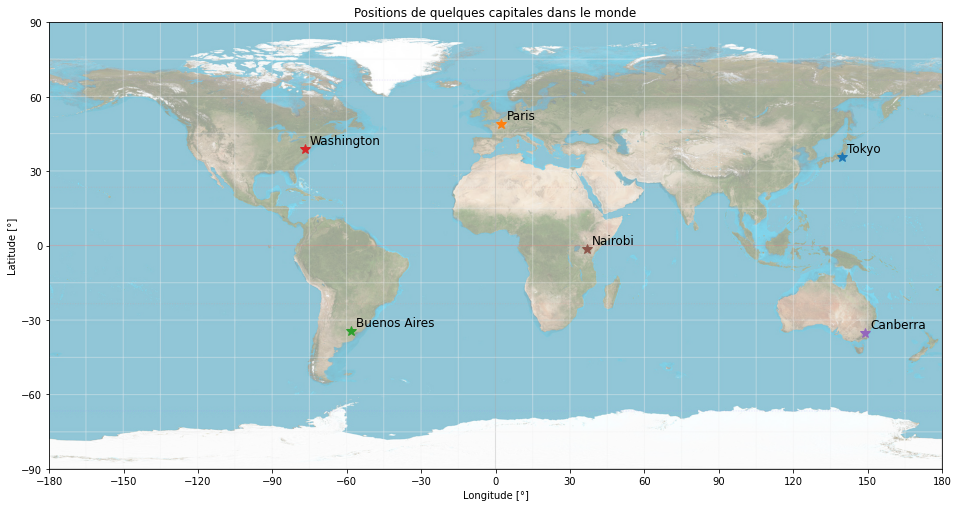

In [3]:
# Les latitudes et longitudes de quelques capitales
capitals = {
    'Tokyo': (35.689722, 139.692222),
    'Paris': (48.856578, 2.351828),
    'Buenos Aires': (-34.608051, -58.370256),
    'Washington': (38.8951005, -77.0365673),
    'Canberra': (-35.293056, 149.126944),
    'Nairobi': (-1.283333, 36.816667),
}

# Utilisation de la fonction de fond de carte en tant que contexte
with worldmap():
    for city_name, coordinates in capitals.items():
        # Inversion des coordonnées pour représentation
        plt_coords = np.array(coordinates[::-1])
        # Affichage de la capitale en tant qu'étoile sur la carte
        plt.plot(*plt_coords, label=city_name, marker='*', ms=10)
        # Etiquette du nom de la capitale légèrement décalée à coté de son point
        plt.text(*(plt_coords + 2), city_name, fontsize=12)
    # Ajout d'un titre à la représentation
    plt.title("Positions de quelques capitales dans le monde")

## Ajout à la bibliothèque
Cette fonction est ajoutée à la bibliothèque `isslib` en tant que ressources du sous-module `isslib.visualization`.